# FIFA World Cup 2022 With EDA ⚽️🏆 

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from fasteda import fast_eda

In [ ]:
# Veriseti
data = pd.read_csv("/content/international_matches.csv" , sep = ',')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
data = data[data["date"] > "2022-01-01"]

In [ ]:
data.head(1)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23350,2022-01-02,Gabon,Burkina Faso,Africa,Africa,89,60,1262,1397,0,...,No,Lose,NaN,73.0,68.8,NaN,74.0,69.5,71.7,67.0


In [ ]:
data = data.reset_index()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          571 non-null    int64  
 1   date                           571 non-null    object 
 2   home_team                      571 non-null    object 
 3   away_team                      571 non-null    object 
 4   home_team_continent            571 non-null    object 
 5   away_team_continent            571 non-null    object 
 6   home_team_fifa_rank            571 non-null    int64  
 7   away_team_fifa_rank            571 non-null    int64  
 8   home_team_total_fifa_points    571 non-null    int64  
 9   away_team_total_fifa_points    571 non-null    int64  
 10  home_team_score                571 non-null    int64  
 11  away_team_score                571 non-null    int64  
 12  tournament                     571 non-null    obj

In [ ]:
LastDate = data.sort_values(['home_team', 'date'], ascending=[True, False])

In [ ]:
data['last_date'] = LastDate.groupby('home_team').cumcount()+1

In [ ]:
fifa_points = data.nlargest(20, 'home_team_total_fifa_points')

Text(0.5, 1.0, 'Top 10 - Fifa Points')

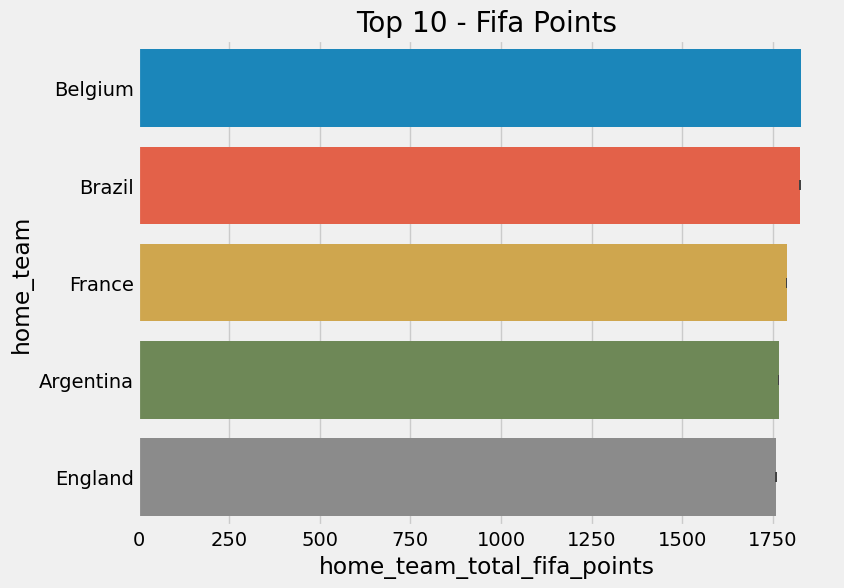

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=fifa_points.head(15),y='home_team',x='home_team_total_fifa_points')
plt.title("Top 10 - Fifa Points")

Text(0.5, 1.0, 'Top 10 - Fifa Points')

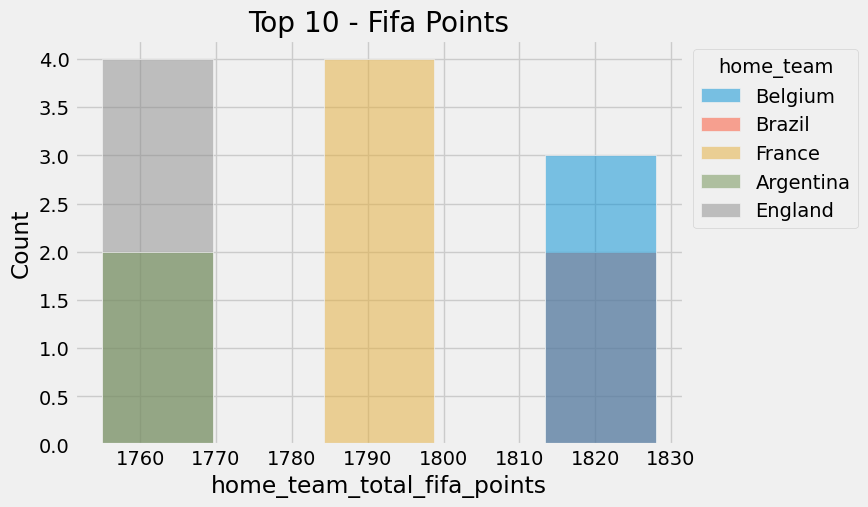

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
ax = sns.histplot(fifa_points.head(15), x="home_team_total_fifa_points", hue="home_team")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Top 10 - Fifa Points")

In [ ]:
offense_score = data.nlargest(20, 'home_team_mean_offense_score')

Text(0.5, 1.0, 'Top 10 Offense')

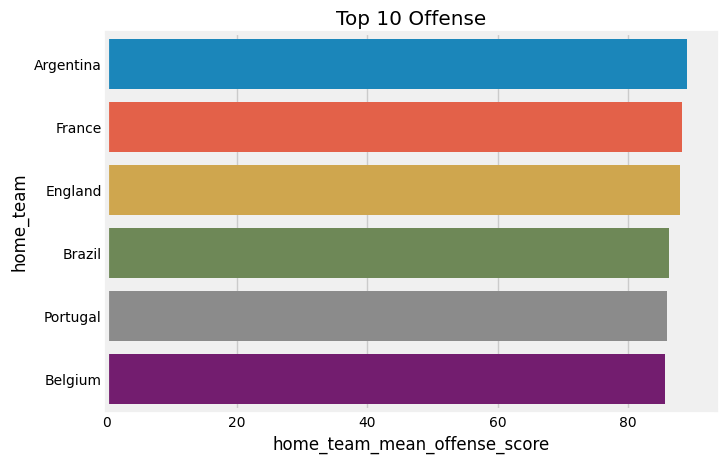

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=offense_score.head(20),y='home_team',x='home_team_mean_offense_score')
plt.title("Top 10 Offense")

DataFrame Head:


,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,last_date
0,23350,2022-01-02,Gabon,Burkina Faso,Africa,Africa,89,60,1262,1397,...,Lose,NaN,73.0,68.8,NaN,74.0,69.5,71.7,67.0,4
1,23351,2022-01-02,Sudan,Zimbabwe,Africa,Africa,125,121,1131,1138,...,Draw,NaN,NaN,NaN,62.3,NaN,65.0,72.3,NaN,3
2,23352,2022-01-03,Rwanda,Guinea,Africa,Africa,135,81,1095,1298,...,Win,NaN,69.0,NaN,NaN,NaN,70.5,73.3,75.0,2


DataFrame Tail:


,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,last_date
568,23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,...,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,1
569,23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,...,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0,1
570,23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,...,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8,1


----------------------------------------------------------------------------------------------------
Missing values:


,0
home_team_goalkeeper_score,242
away_team_goalkeeper_score,269
home_team_mean_defense_score,268
home_team_mean_offense_score,241
home_team_mean_midfield_score,250
away_team_mean_defense_score,292
away_team_mean_offense_score,248
away_team_mean_midfield_score,268


----------------------------------------------------------------------------------------------------
MSNO Matrix:



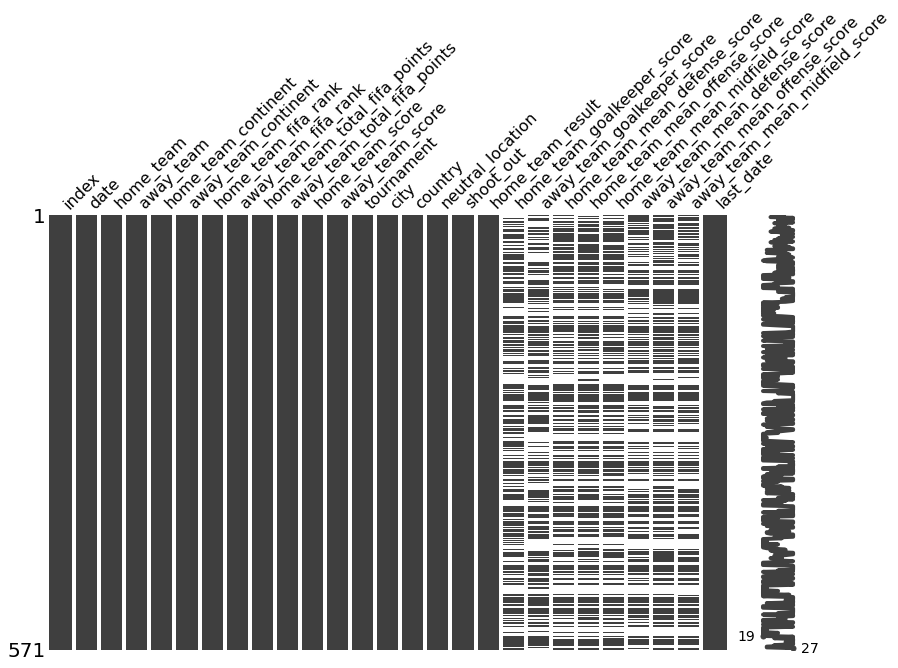

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(571, 27)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          571 non-null    int64  
 1   date                           571 non-null    object 
 2   home_team                      571 non-null    object 
 3   away_team                      571 non-null    object 
 4   home_team_continent            571 non-null    object 
 5   away_team_continent            571 non-null    object 
 6   home_team_fifa_rank            571 non-null    int64  
 7   away_team_fifa_rank            571 non-null    int64  
 8   home_team_total_fifa_points    571 non-

,count,mean,std,min,25%,50%,75%,max
index,571.000000,23635.000000,164.977776,23350.000000,23492.500000,23635.000000,23777.500000,23920.000000
home_team_fifa_rank,571.000000,86.971979,57.388696,1.000000,36.000000,81.000000,132.000000,211.000000
away_team_fifa_rank,571.000000,93.697023,56.176392,1.000000,46.500000,87.000000,138.000000,211.000000
home_team_total_fifa_points,571.000000,1296.262697,243.099570,776.000000,1118.000000,1293.000000,1479.500000,1828.000000
away_team_total_fifa_points,571.000000,1267.250438,234.815766,776.000000,1084.000000,1267.000000,1450.000000,1832.000000
home_team_score,571.000000,1.523643,1.435411,0.000000,0.000000,1.000000,2.000000,9.000000
away_team_score,571.000000,0.954466,1.133862,0.000000,0.000000,1.000000,1.000000,10.000000
home_team_goalkeeper_score,329.000000,74.376900,8.200845,51.000000,69.000000,75.000000,80.000000,91.000000
away_team_goalkeeper_score,302.000000,74.019868,8.475464,51.000000,69.000000,74.000000,80.000000,91.000000
home_team_mean_defense_score,303.000000,74.891089,5.247865,61.000000,71.500000,75.000000,77.800000,86.500000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



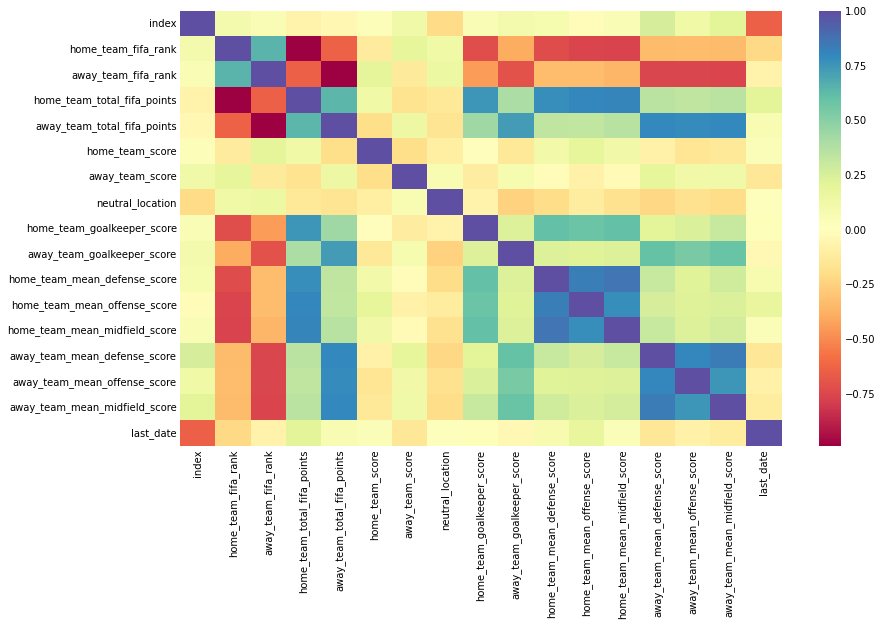

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



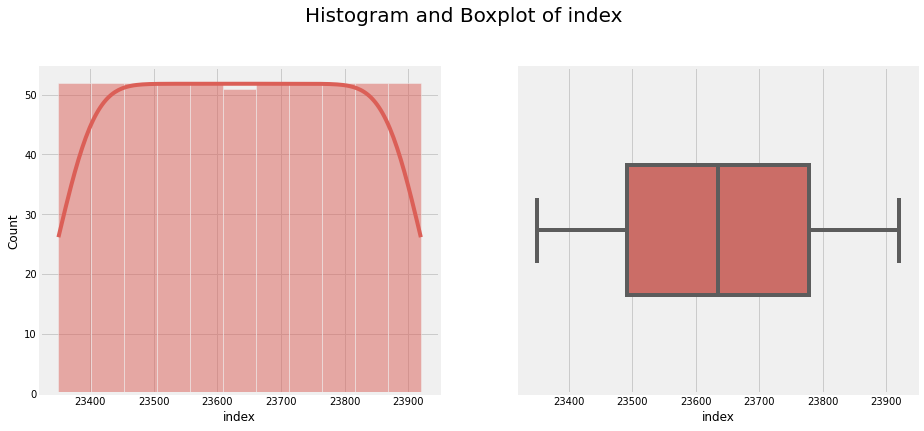

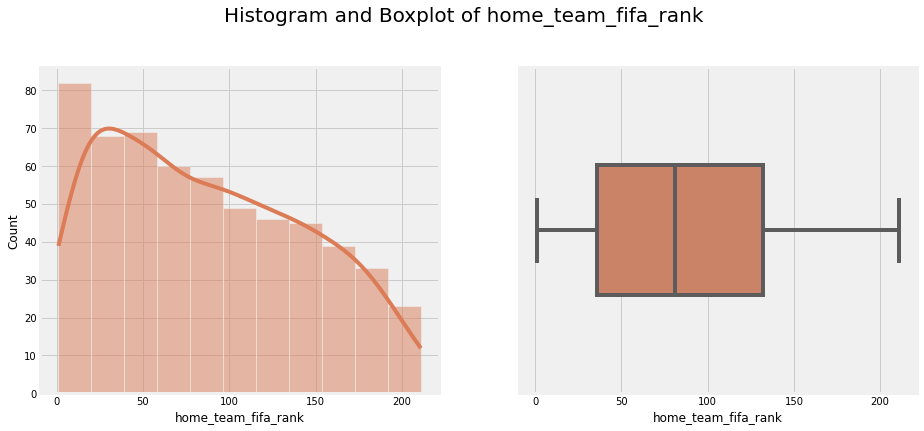

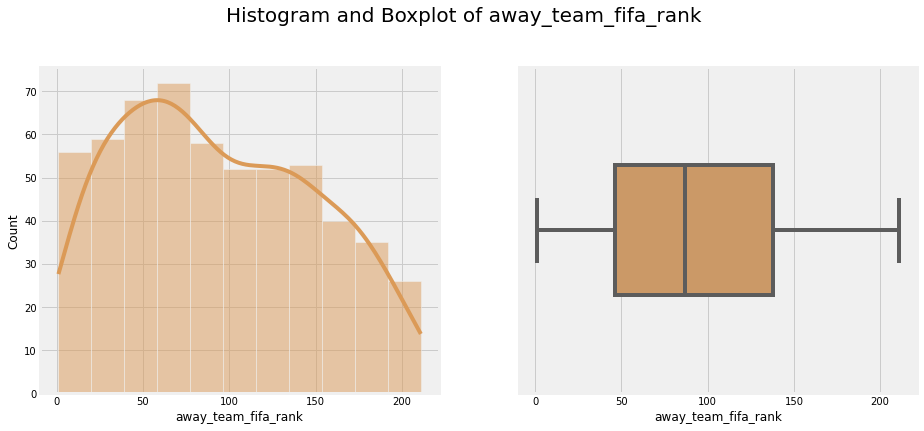

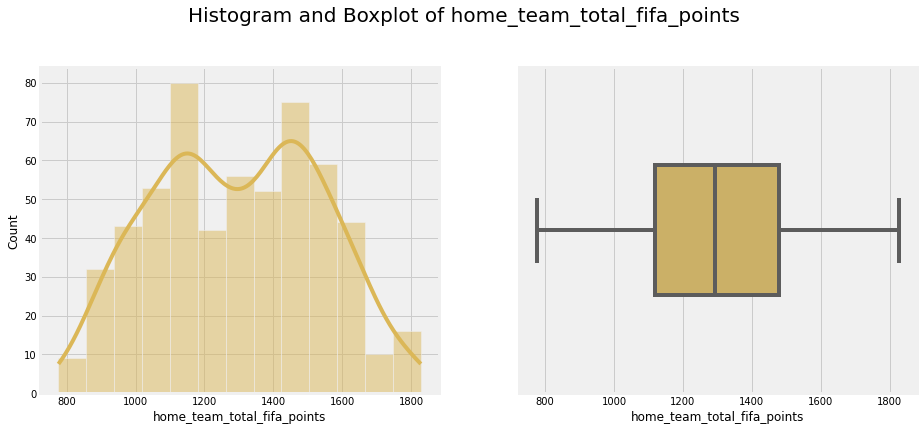

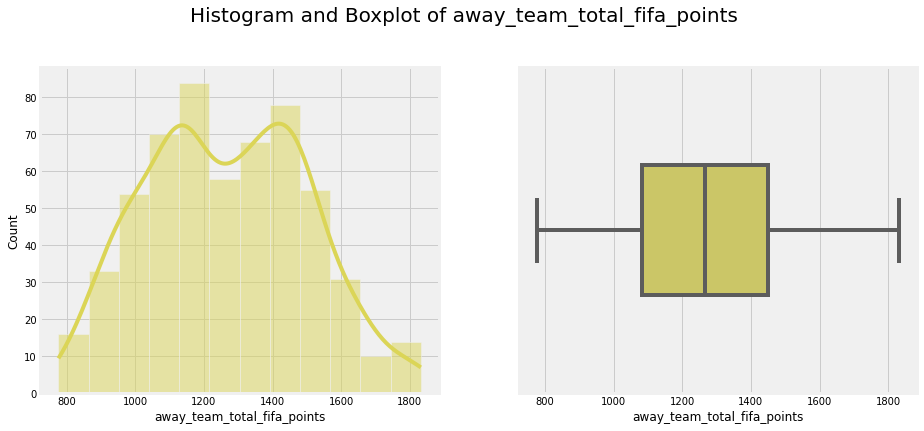

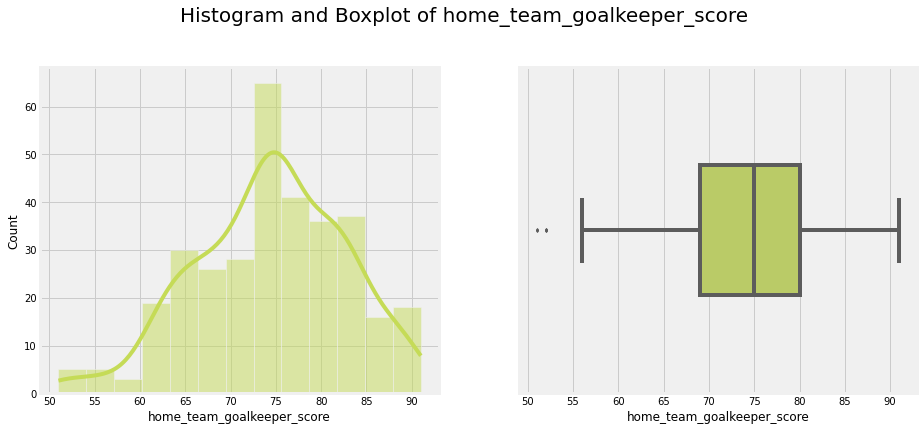

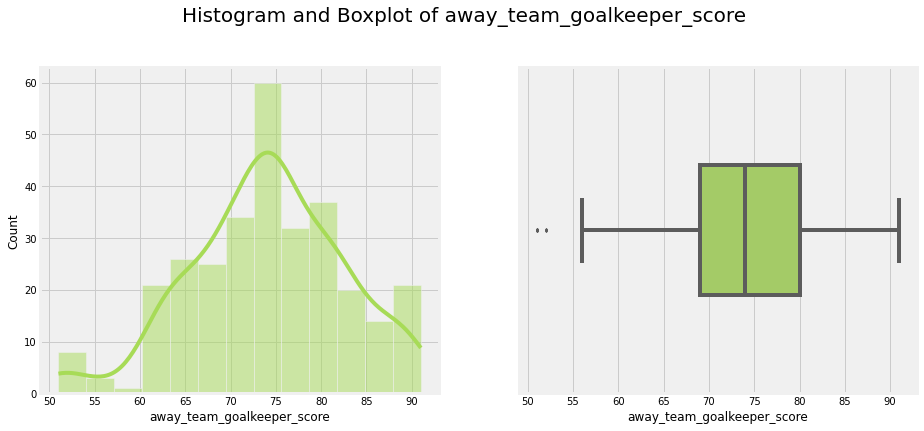

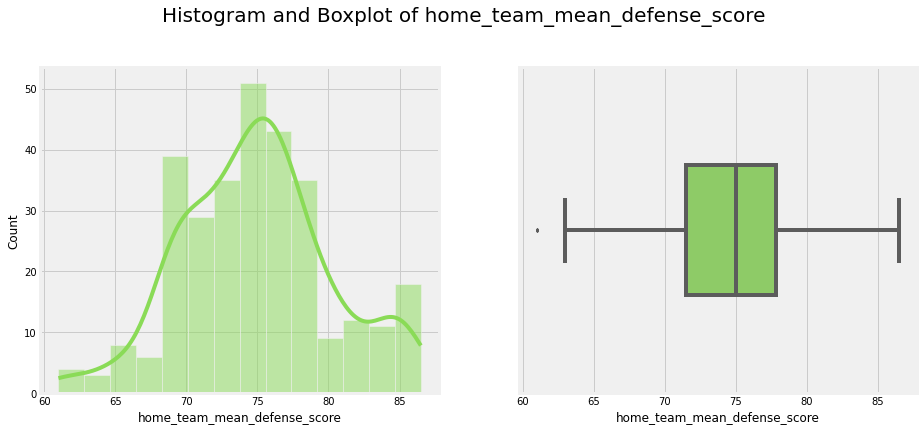

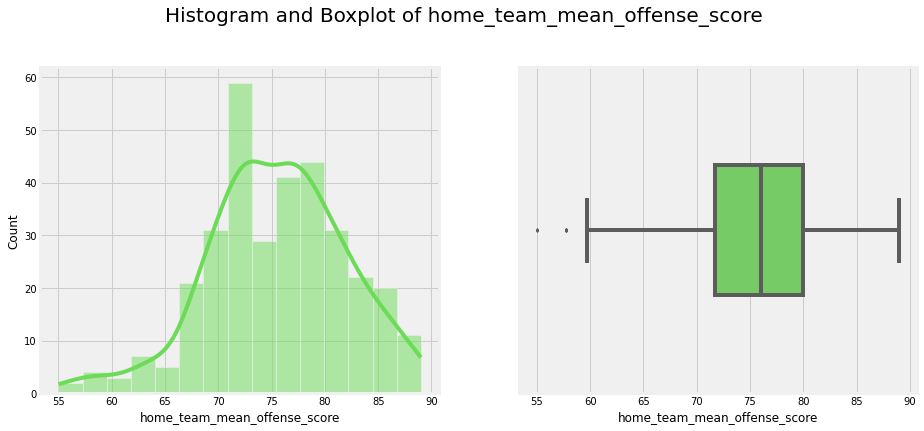

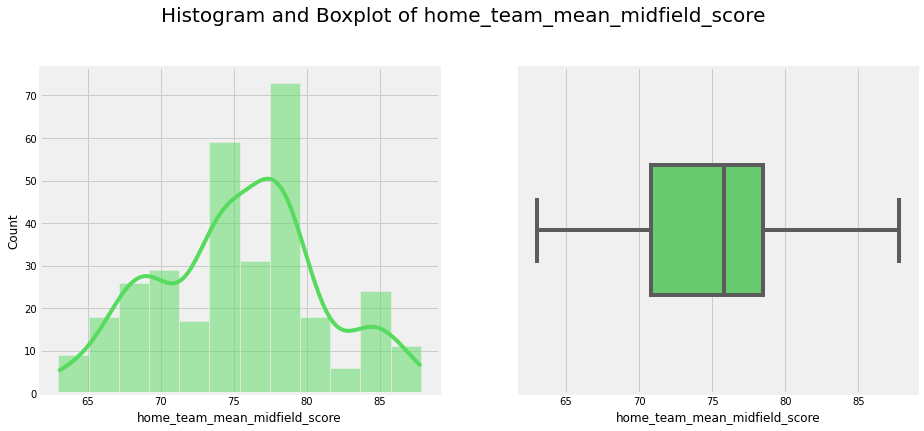

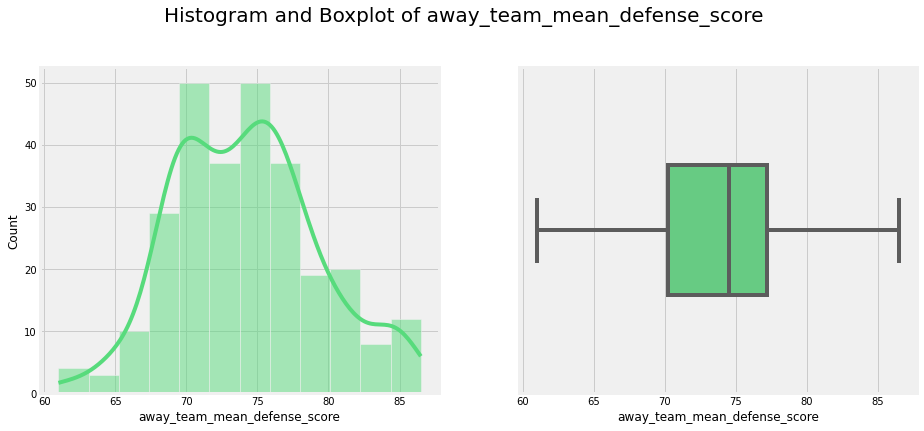

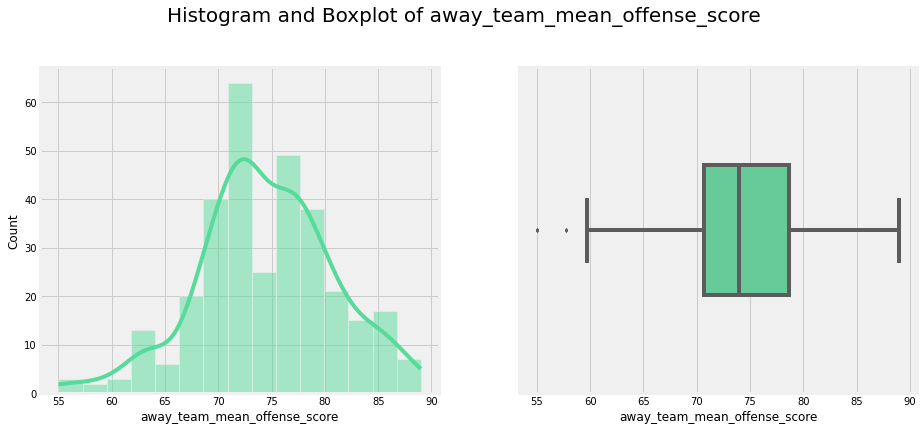

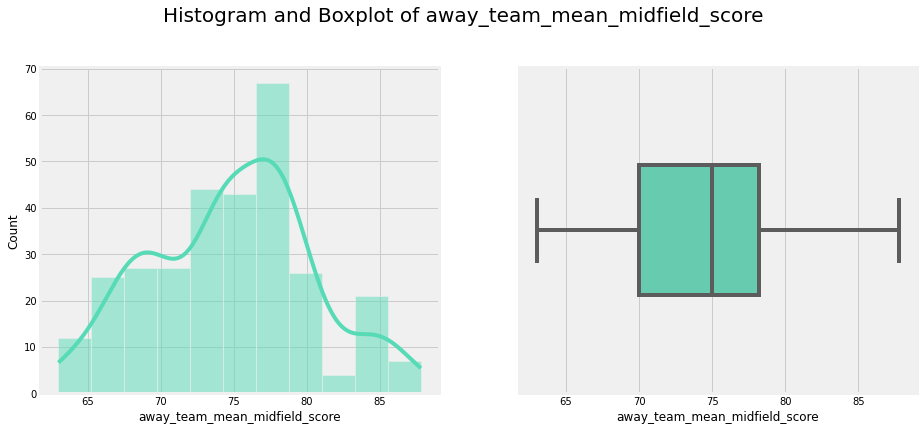

----------------------------------------------------------------------------------------------------
Countplot(s):



AttributeError: ignored

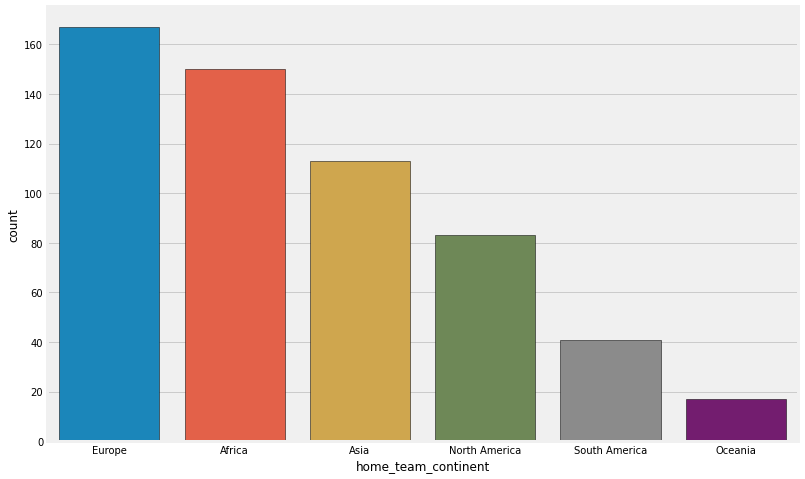

In [ ]:
fast_eda(data)
